<a href="https://colab.research.google.com/github/Afag-Ramazanova/Interpretable-customer-churn-prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone the GitHub repository
!git clone https://github.com/Afag-Ramazanova/Interpretable-customer-churn-prediction.git
%cd Interpretable-customer-churn-prediction

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
!pip install pygam
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, roc_curve, roc_auc_score, precision_recall_curve,
                            average_precision_score, precision_score, recall_score, f1_score)
from pygam import LogisticGAM, s, f

In [ ]:
df = pd.read_csv(r'/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploratory Data Analysis

In [ ]:
print("Dataset shape:")
print(df.shape)
df.head()

Dataset shape:
(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols + ['Churn'] + ['TotalCharges']]

print('Numeric:', numeric_cols)
print('Categorical:', categorical_cols)

Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
numeric_cols.append("TotalCharges")

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.dropna(inplace=True)

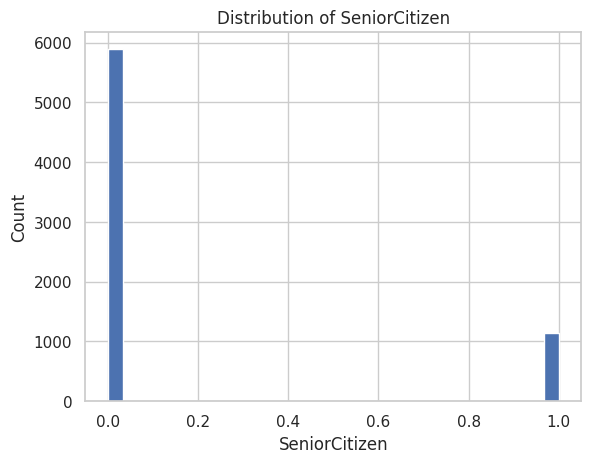

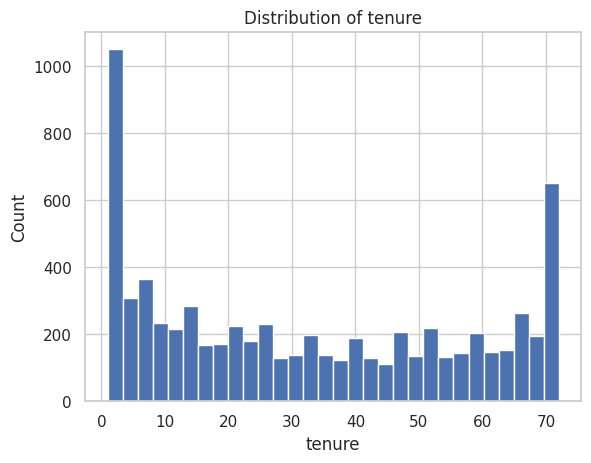

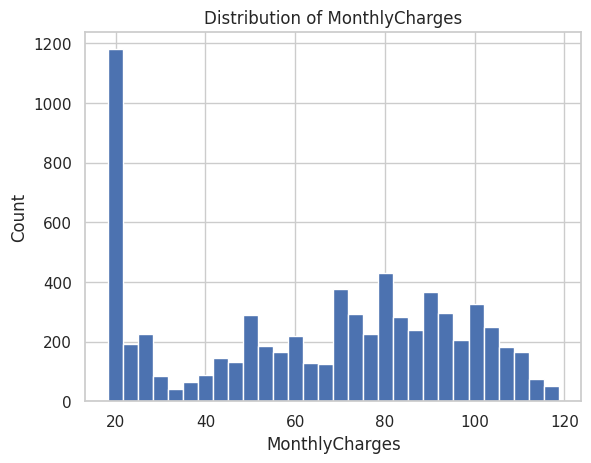

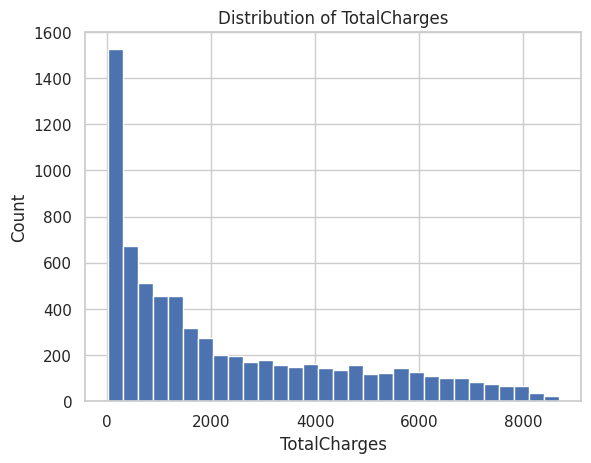

In [ ]:
# Visualizing numeric columns

for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

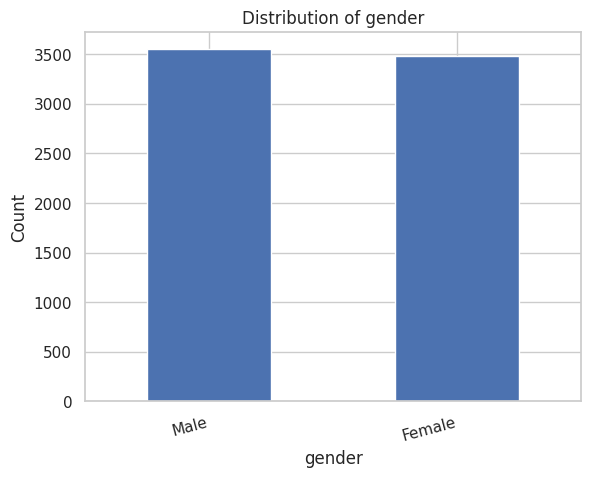

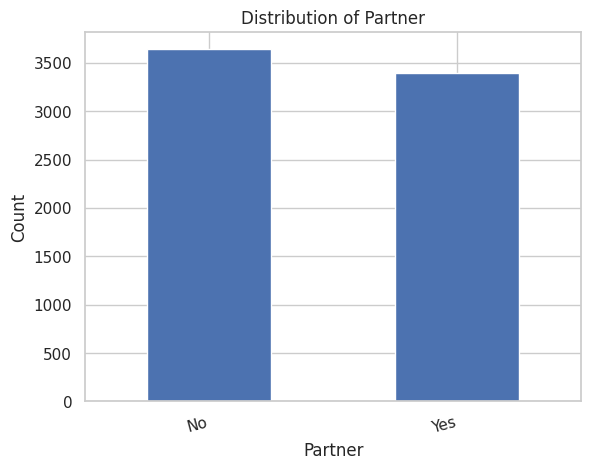

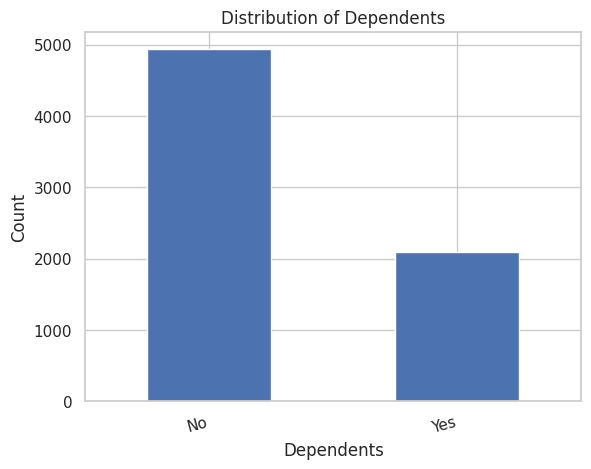

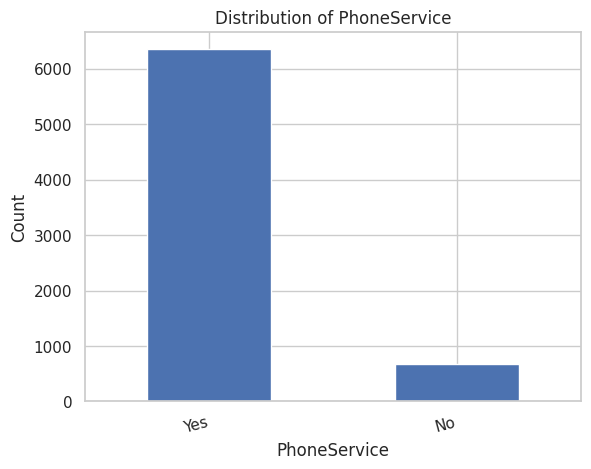

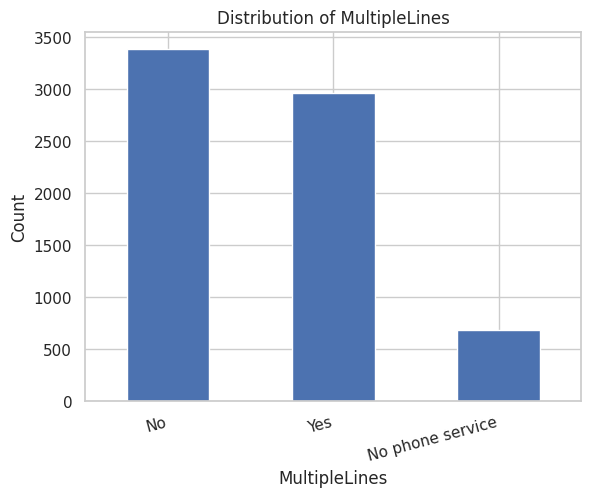

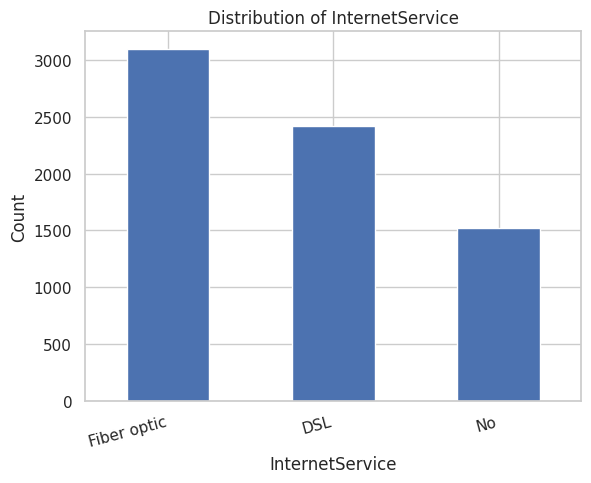

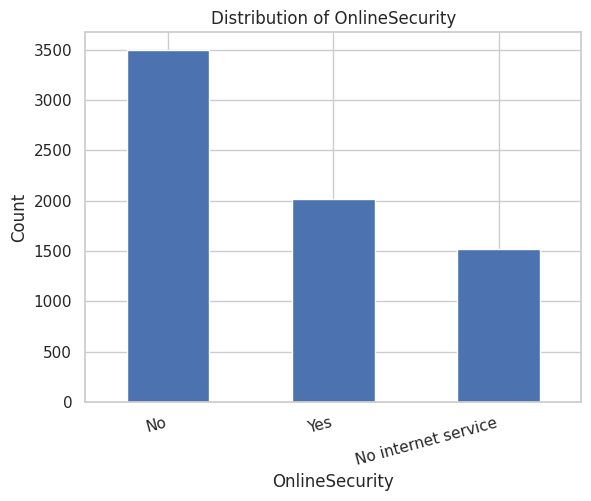

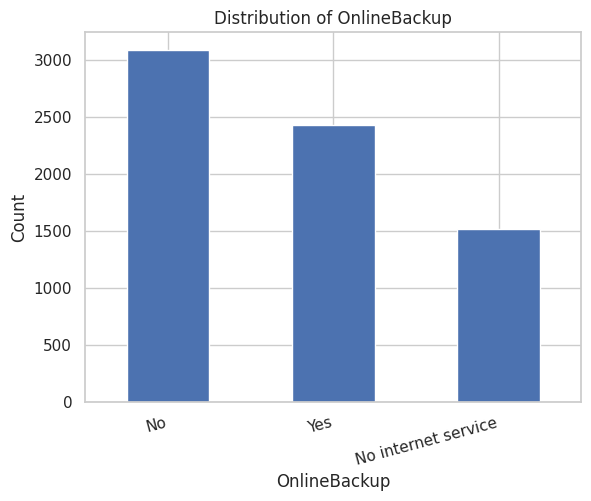

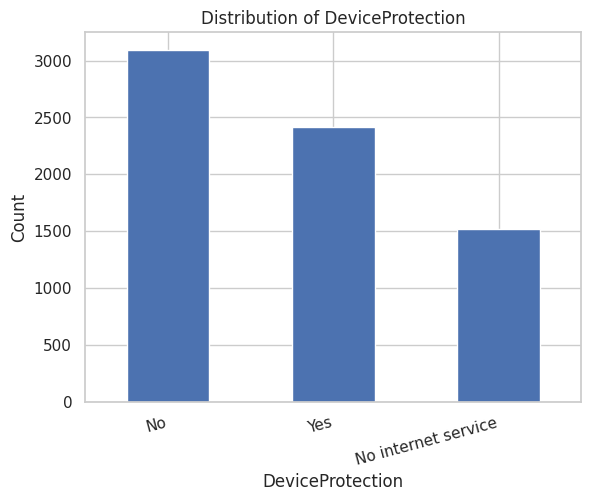

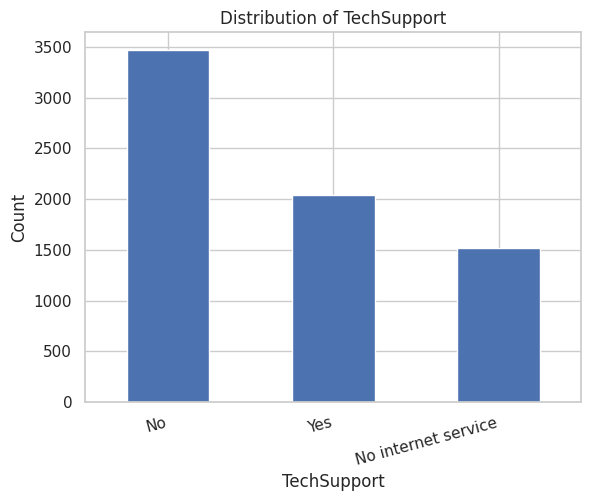

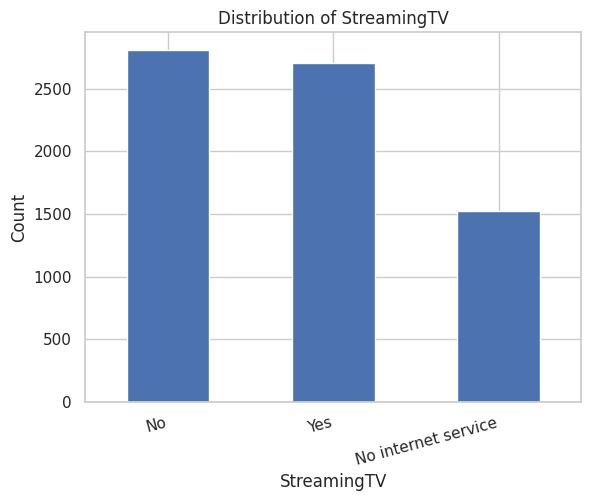

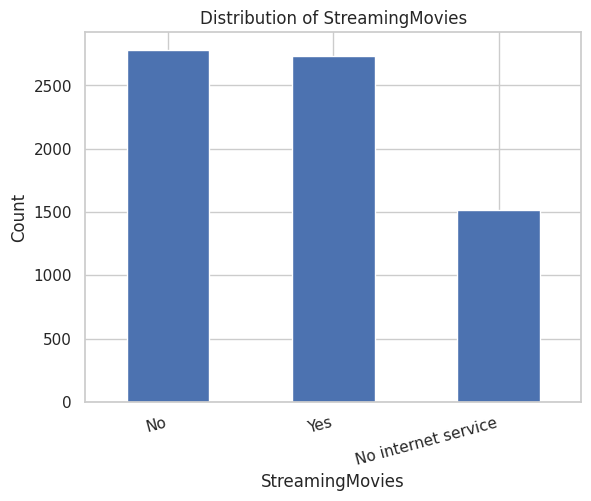

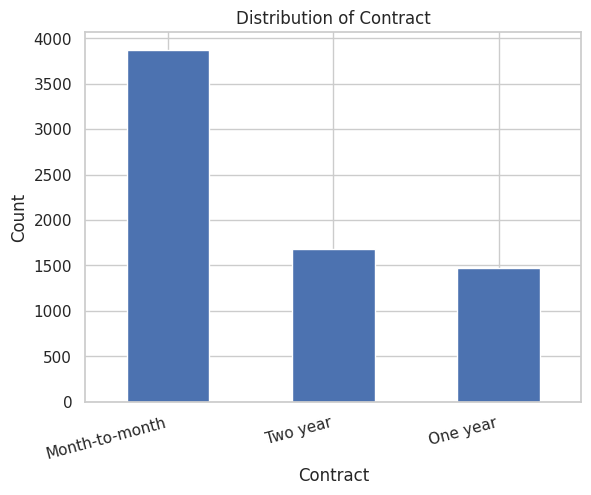

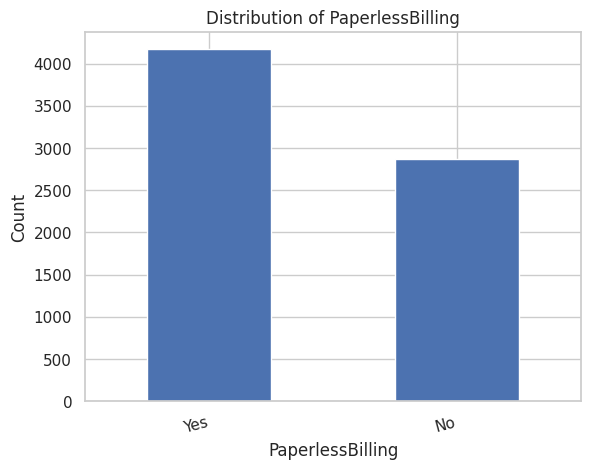

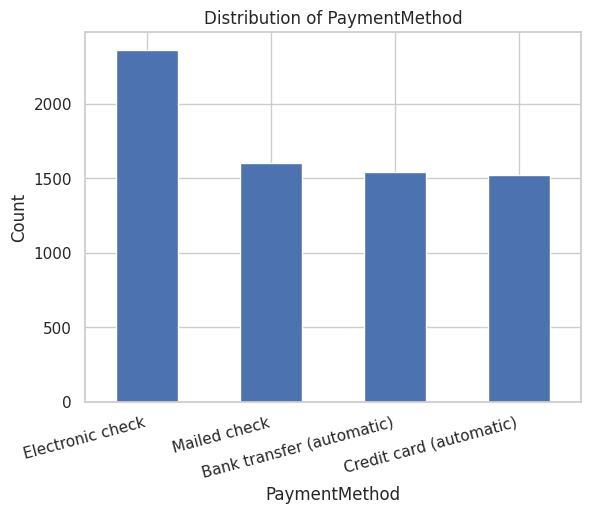

In [ ]:
# Bar plots for categorical columns
for col in categorical_cols[1:]: #filtering our customer_id column
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=15, ha='right')
    plt.show()

## Visualizing relationship between features and Churn variable

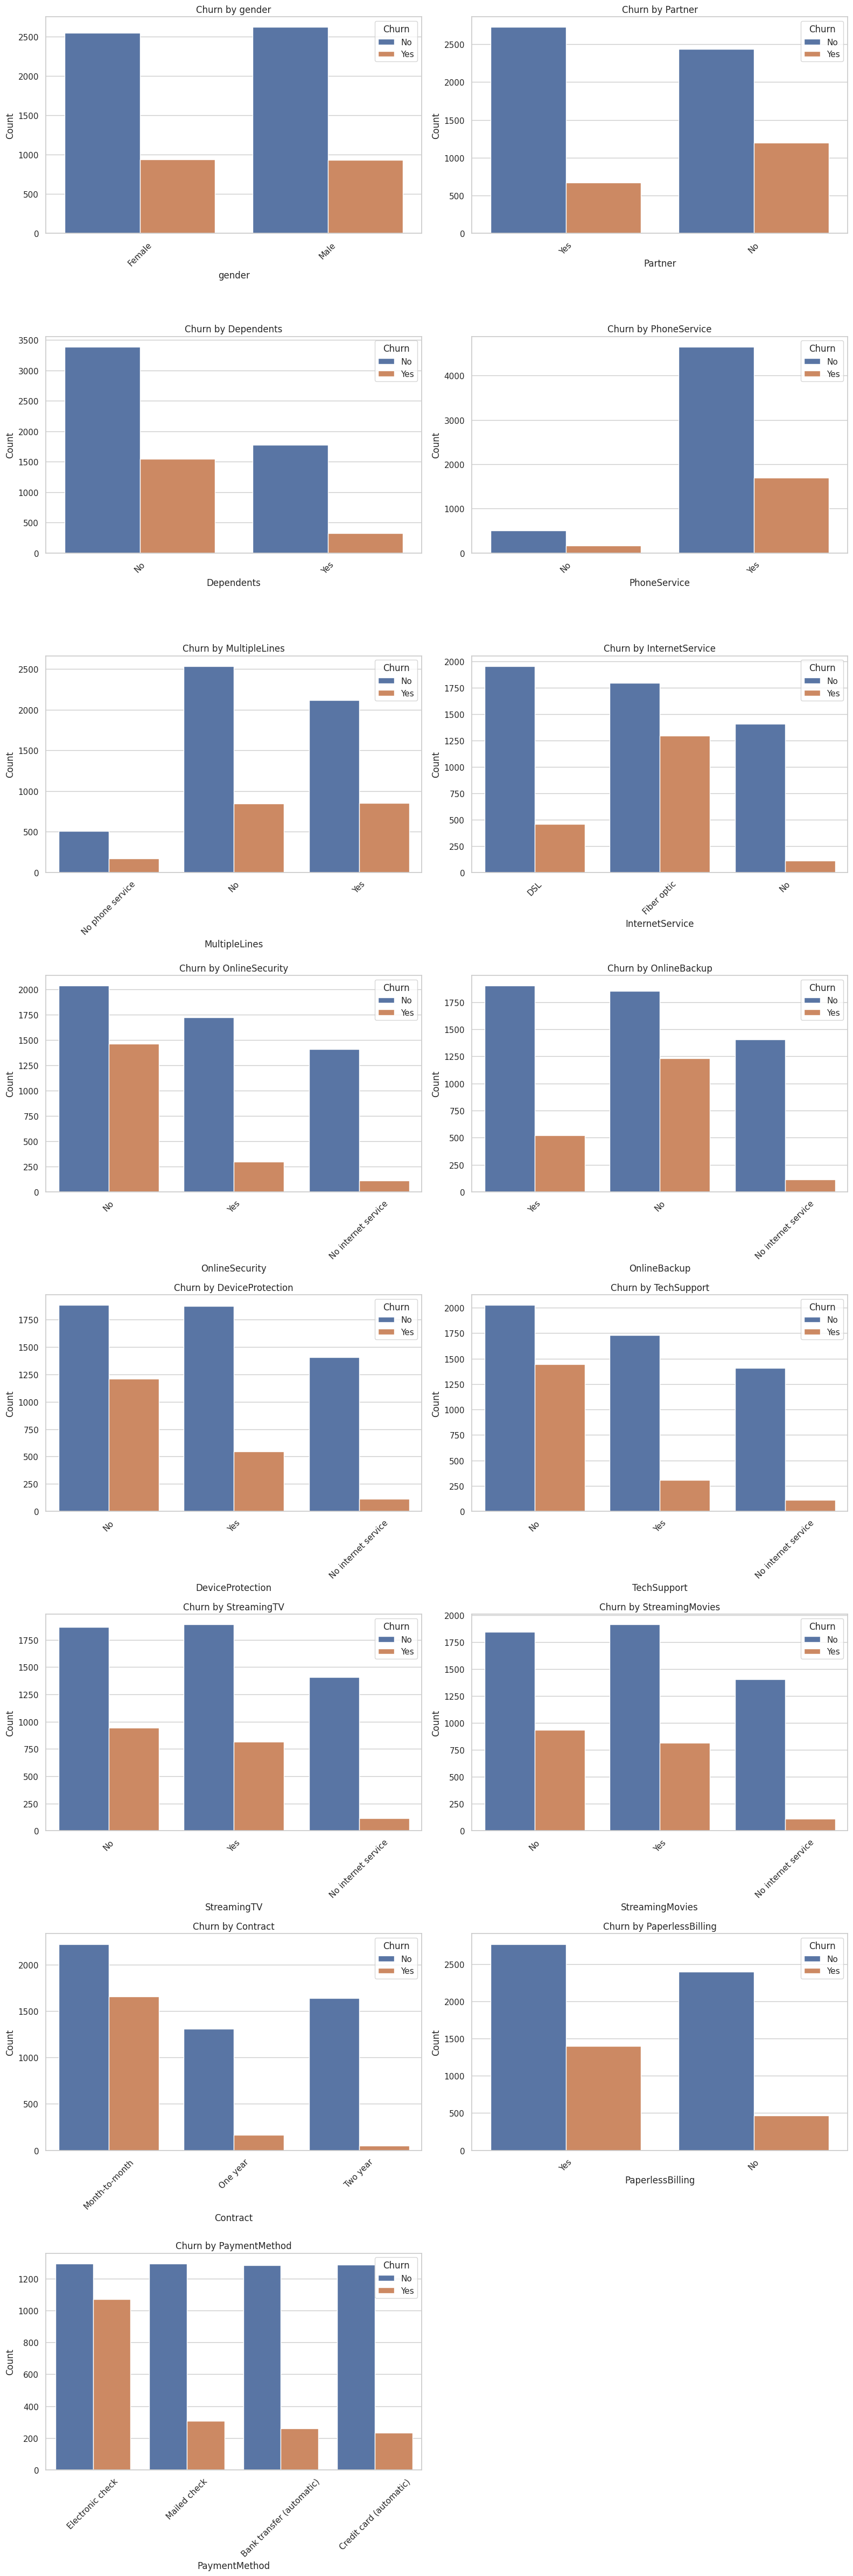

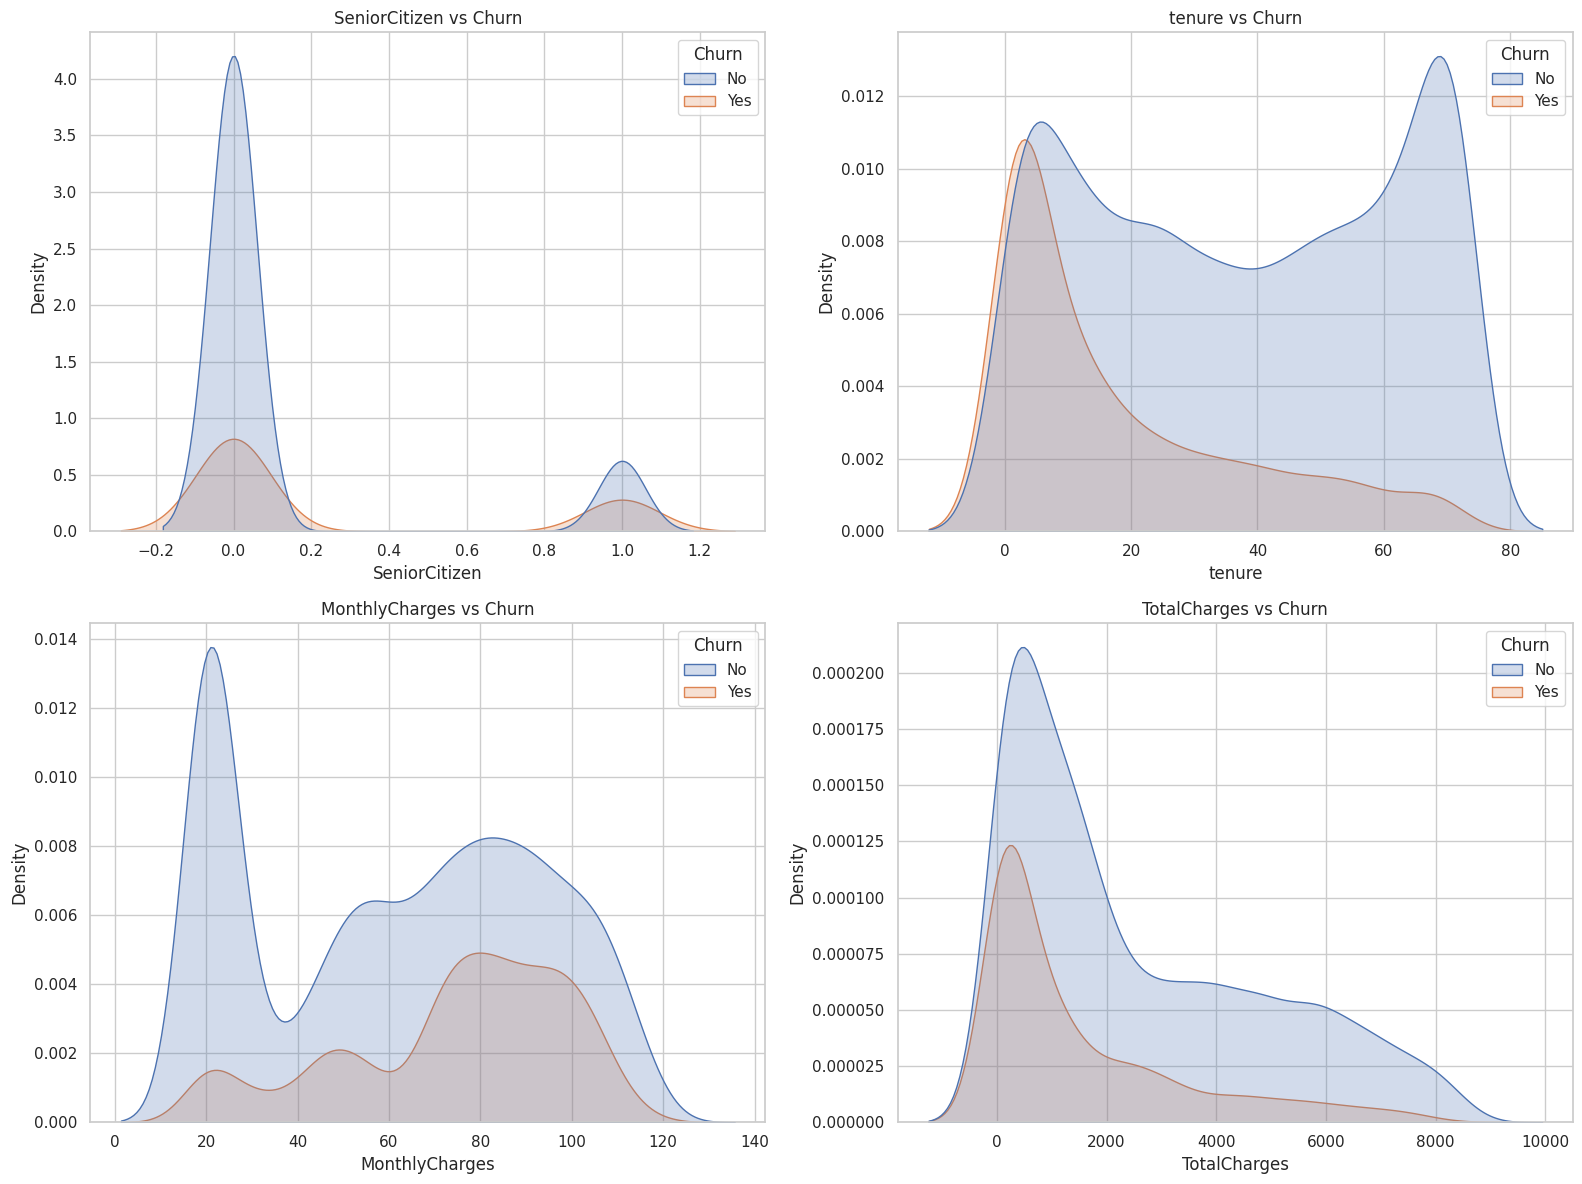

In [ ]:
# Visualizing relationship between categorical features and Churn
n_categorical = len(categorical_cols[1:])
n_rows_cat = (n_categorical + 1) // 2
fig_cat, axes_cat = plt.subplots(n_rows_cat, 2, figsize=(16, n_rows_cat * 6))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_cols[1:]):  # Exclude 'customerID'
    sns.countplot(data=df, x=col, hue='Churn', ax=axes_cat[i])
    axes_cat[i].set_title(f'Churn by {col}')
    axes_cat[i].set_xlabel(col)
    axes_cat[i].set_ylabel('Count')
    axes_cat[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.show()

# Visualizing relationship between numerical features and Churn
n_numerical = len(numeric_cols)
n_rows_num = (n_numerical + 1) // 2
fig_num, axes_num = plt.subplots(n_rows_num, 2, figsize=(16, n_rows_num * 6))
axes_num = axes_num.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, ax=axes_num[i])
    axes_num[i].set_title(f'{col} vs Churn')
    axes_num[i].set_xlabel(col)
    axes_num[i].set_ylabel('Density')

for j in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[j])

plt.tight_layout()
plt.show()

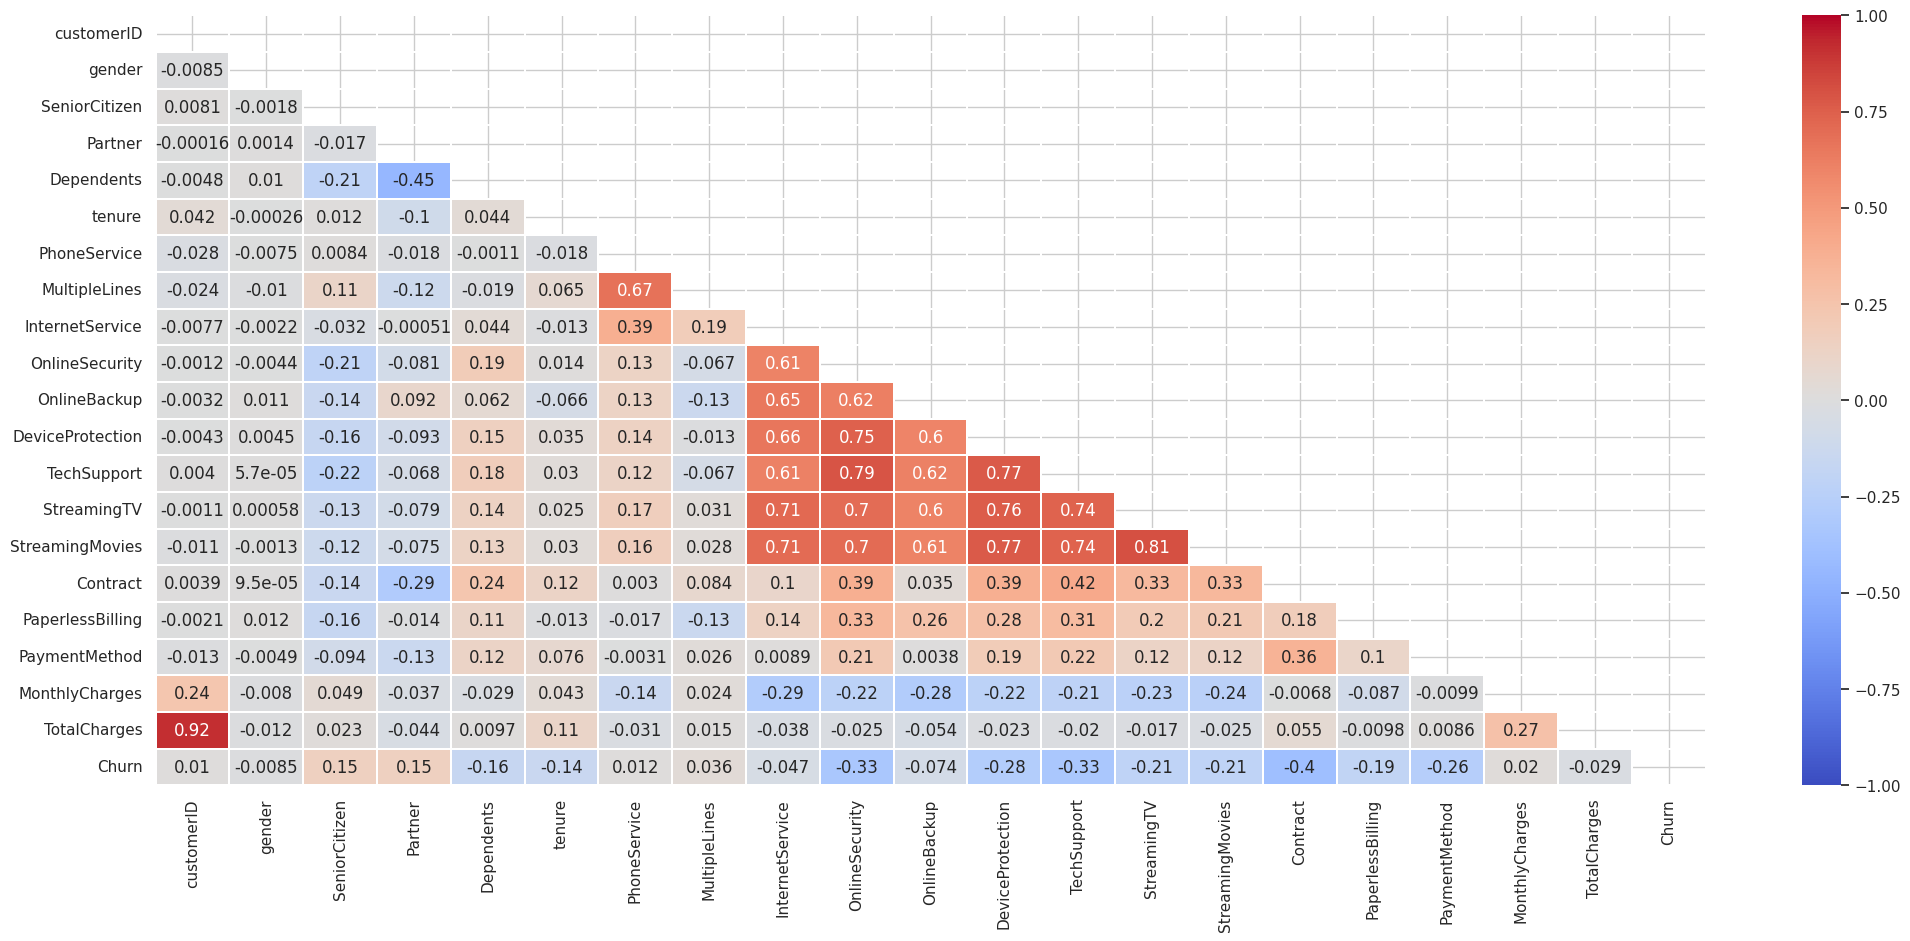

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# Ensure binary target (1 for churn, 0 otherwise)
y = (df['Churn'].astype(str).str.lower().str.strip() == 'yes').astype(int)
X = df.drop(columns=['Churn'])

In [ ]:
def vif_table(X):
    vif = pd.DataFrame({
        "feature": X.columns,
        "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    }).sort_values("VIF", ascending=False)
    return vif

In [ ]:
# Target: churn as 0/1
df["Churn_yes"] = (df["Churn"].str.strip().str.lower() == "yes").astype(int)

# Feature columns (drop id + original Churn)
feature_cols = [c for c in df.columns if c not in ["customerID", "Churn", "Churn_yes"]]

# Train / Test split
train_df, test_df = train_test_split(
    df, test_size=0.30, random_state=42
)

X_train = pd.get_dummies(train_df[feature_cols], drop_first=True)
X_test  = pd.get_dummies(test_df[feature_cols], drop_first=True)

# Align columns between train and test
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

y_train = train_df["Churn_yes"].values
y_test  = test_df["Churn_yes"].values

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Overall churn rate: {df['Churn_yes'].mean():.2%}")

Train shape: (4922, 30), Test shape: (2110, 30)
Overall churn rate: 26.58%


## Linear Regression

In [ ]:
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, log_loss, brier_score_loss
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,
    f1_score, log_loss, brier_score_loss
)


numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = [
    "gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
    "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
    "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"
]

categorical_features = categorical_features + ["Churn"]
df_dummies = pd.get_dummies(df[categorical_features], drop_first=True).astype(int)

df_final = pd.concat([df[numeric_features], df_dummies], axis=1)

target = "Churn_Yes"
X_vars = df_final.drop(columns=[target]).copy()
y_var = df_final[target].copy()

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_vars, y_var, test_size=0.30, random_state=42, stratify=y_var
)

X_train_const = sm.add_constant(X_train, has_constant="add")
X_test_const  = sm.add_constant(X_test,  has_constant="add")

print(f"Train shape: {X_train_const.shape}, Test shape: {X_test_const.shape}")
print(f"Baseline churn rate: {y_var.mean():.2%}")

Train shape: (4922, 31), Test shape: (2110, 31)
Baseline churn rate: 26.58%


#### Linear Regression

                            OLS Regression Results                            
Dep. Variable:              Churn_Yes   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:38:56   Log-Likelihood:                -2116.5
No. Observations:                4922   AIC:                             4281.
Df Residuals:                    4898   BIC:                             4437.
Df Model:                          23                                         
Covariance Type:                  HC3                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

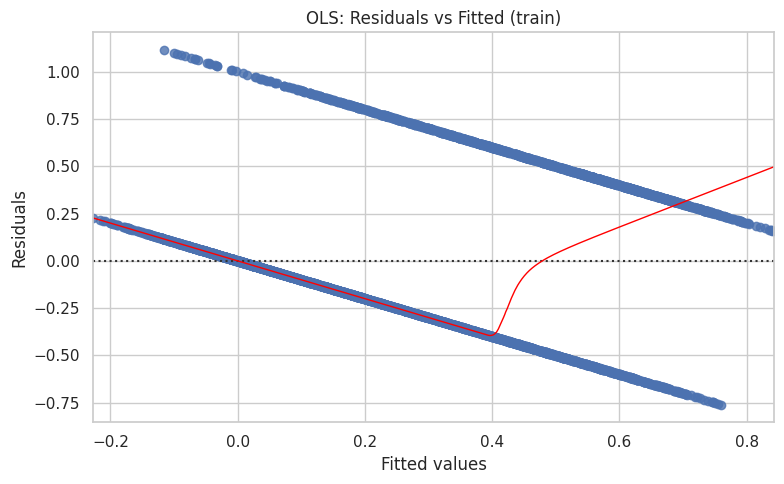

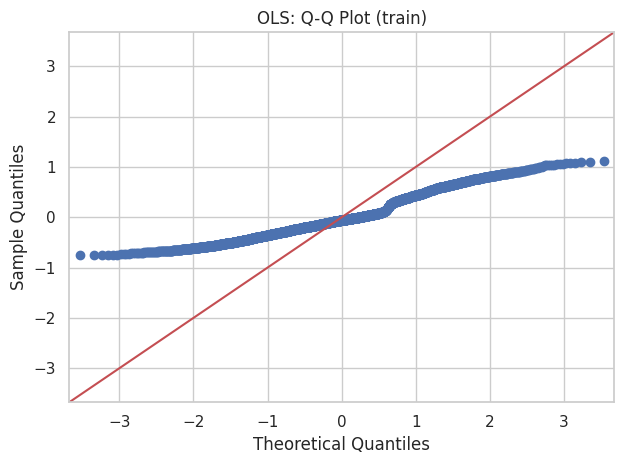

In [ ]:
linear_model = sm.OLS(y_train, X_train_const).fit(cov_type="HC3")
print(linear_model.summary())

vif_df = vif_table(X_train_const.drop(columns=["const"]))

print("\n=== Variance Inflation Factors (VIF) ===")
print(vif_df.to_string(index=False))
# Performance

# Make predictions
y_train_pred = linear_model.predict(X_train_const)
y_test_pred = linear_model.predict(X_test_const)
# Evaluate model performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
# Print performance metrics
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
# Residuals plot on TRAIN
plt.figure(figsize=(8,5))
sns.residplot(x=linear_model.fittedvalues, y=linear_model.resid, lowess=True,
              line_kws={"color": "red", "lw": 1})
plt.xlabel("Fitted values"); plt.ylabel("Residuals")
plt.title("OLS: Residuals vs Fitted (train)"); plt.tight_layout(); plt.show()

sm.qqplot(linear_model.resid, line="45")
plt.title("OLS: Q-Q Plot (train)"); plt.tight_layout(); plt.show()

#### Linear Model coefficients


# Coefficient table for top 15 features #
                            Feature  Coefficient  Abs_Coefficient
10      InternetService_Fiber optic     0.322678         0.322678
7                  PhoneService_Yes     0.231805         0.231805
8    MultipleLines_No phone service     0.144099         0.144099
23              StreamingMovies_Yes     0.113538         0.113538
21                  StreamingTV_Yes     0.111010         0.111010
24                Contract_One year    -0.107208         0.107208
9                 MultipleLines_Yes     0.089610         0.089610
25                Contract_Two year    -0.072438         0.072438
28   PaymentMethod_Electronic check     0.072353         0.072353
18  TechSupport_No internet service    -0.043695         0.043695


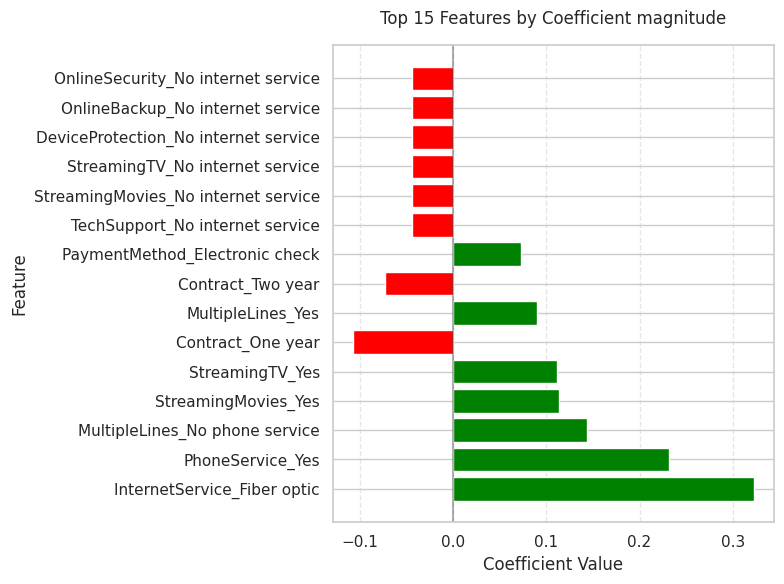

In [ ]:
feature_names = [c for c in X_train_const.columns if c != "const"]
coef_values = linear_model.params.loc[feature_names].values

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef_values
})

coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Print top features by coefficient magnitude
print("\n# Coefficient table for top 15 features #")
print(coef_df.head(10))

# Plot coefficients
plt.figure(figsize=(8, 6))
top_features = coef_df.head(15)
colors = ['red' if coef < 0 else 'green' for coef in top_features['Coefficient']]

plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 Features by Coefficient magnitude', pad=15)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

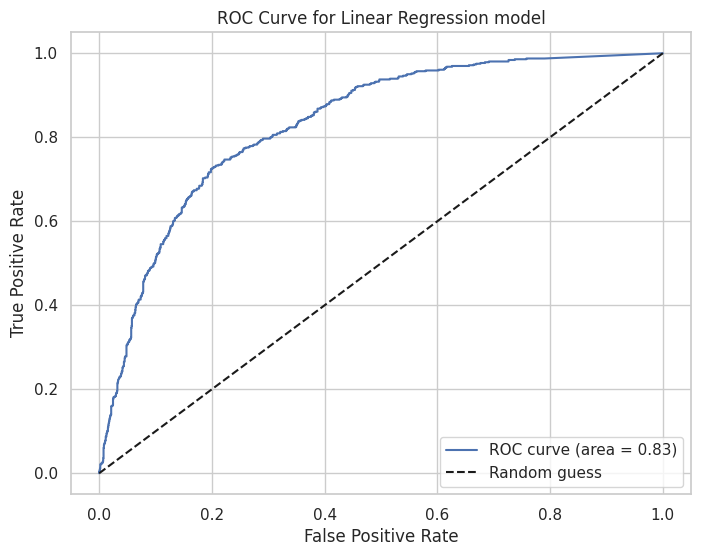

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

ols_pred = linear_model.predict(X_test_const)
ols_prob = np.clip(ols_pred, 1e-6, 1-1e-6) ## clip the values for roc

fpr, tpr, _ = roc_curve(y_test, ols_prob)
roc_auc = roc_auc_score(y_test, ols_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Linear Regression model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The linear regression model explains about 30.6% of the variance in churn (R^2 = 0.3064) and is statistically significant overall, indicating that the included features provide meaningful insights into customer behavior. The model’s root mean squared error (RMSE) is 0.3705, reflecting the average prediction error when treating churn as a continuous 0/1 variable. The top predictors by coefficient magnitude include a mix of positive and negative influences on churn. InternetService_Fiber optic (coef ≈ +0.33) and PhoneService_Yes (≈ +0.18) are the strongest positive predictors, substantially increasing churn probability. Other features associated with higher churn include MultipleLines_No phone service, StreamingMovies_Yes, StreamingTV_Yes, MultipleLines_Yes, PaymentMethod_Electronic check, and Streaming services in general, all with positive coefficients. By contrast, Contract_One year (≈ –0.10) and Contract_Two year (≈ –0.08) are strong negative predictors, showing that longer contracts reduce churn likelihood. Similarly, the absence of services such as OnlineSecurity_No internet service, OnlineBackup_No internet service, DeviceProtection_No internet service, StreamingTV_No internet service, StreamingMovies_No internet service, and TechSupport_No internet service all have small negative coefficients, suggesting these categories are associated with slightly lower churn risk compared to their reference groups. However, very high VIF values highlight severe multicollinearity, particularly among internet service related variables, making individual coefficient estimates less reliable. Diagnostic checks show violations of regression assumptions, with heteroscedastic and non-normal residuals suggesting that a linear specification does not fully capture the data’s structure. Despite these limitations, the model achieves an AUC of 0.83 on the test set, along with reasonable LogLoss (0.465) and Brier score (0.142), showing that it can discriminate reasonably well between churners and non-churners, though interpretability and inference are constrained.

Strengths: Simple to compute and straightforward to interpret. Coefficients indicate the direction and approximate magnitude of associations. Provides rough probability estimates and can serve as a quick baseline model.

Weaknesses: Predictions may fall outside the [0,1] range, making probability estimates unreliable. Residual diagnostics often reveal heteroskedasticity, non-normality, and other assumption violations. Multicollinearity (as shown by high VIF values) further reduces reliability. Linear regression is not statistically well-suited for binary outcomes and may yield misleading inference compared to logistic or non-linear alternatives.


#### Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=2000, solver="lbfgs")
log_reg.fit(X_train, y_train)

log_prob = log_reg.predict_proba(X_test)[:, 1]
log_pred = (log_prob >= 0.5).astype(int)

# Performance metrics
log_auc  = roc_auc_score(y_test, log_prob)
log_acc  = accuracy_score(y_test, log_pred)
log_prec = precision_score(y_test, log_pred)
log_rec  = recall_score(y_test, log_pred)
log_f1   = f1_score(y_test, log_pred)
log_ll   = log_loss(y_test, log_prob)
log_brier = brier_score_loss(y_test, log_prob)

print(f"AUC: {log_auc:.3f}")
print(f"Accuracy: {log_acc:.3f}")
print(f"Precision: {log_prec:.3f}")
print(f"Recall: {log_rec:.3f}")
print(f"F1 Score: {log_f1:.3f}")
print(f"LogLoss: {log_ll:.3f}")
print(f"Brier Score: {log_brier:.3f}")



AUC: 0.838
Accuracy: 0.806
Precision: 0.656
Recall: 0.569
F1 Score: 0.609
LogLoss: 0.426
Brier Score: 0.139


#### Logistic Regression Model coefficients


Top 25 logistic features by absolute coefficient:
                             feature      coef  odds_ratio
                   Contract_Two year -1.271509    0.280408
         InternetService_Fiber optic  1.034251    2.812998
                   Contract_One year -0.686798    0.503185
                  OnlineSecurity_Yes -0.401718    0.669169
                     TechSupport_Yes -0.399711    0.670514
                   MultipleLines_Yes  0.385388    1.470184
      PaymentMethod_Electronic check  0.359056    1.431977
                     StreamingTV_Yes  0.347091    1.414946
                 StreamingMovies_Yes  0.335064    1.398029
                PaperlessBilling_Yes  0.326387    1.385951
      MultipleLines_No phone service  0.315375    1.370773
                      Dependents_Yes -0.271188    0.762473
  OnlineSecurity_No internet service -0.185615    0.830593
                  InternetService_No -0.185615    0.830593
DeviceProtection_No internet service -0.185615    0.830593
 Stre

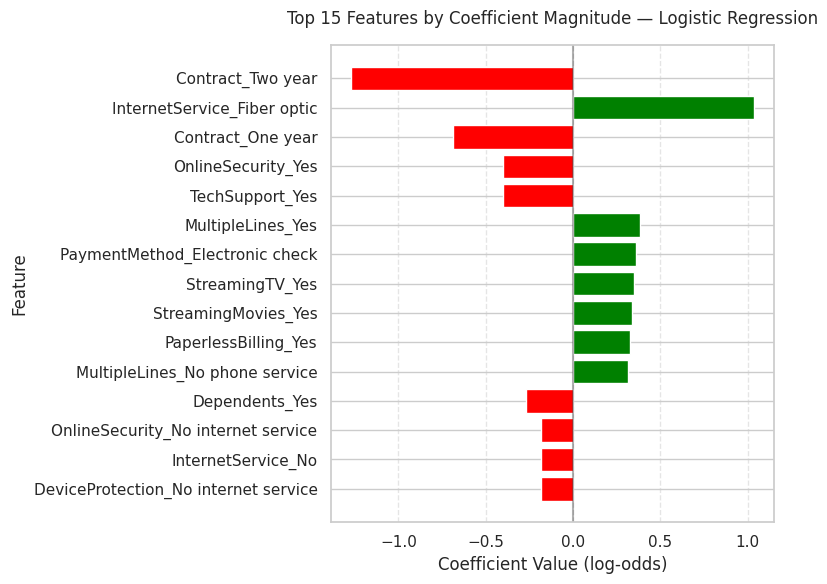

In [ ]:
# Coefficients & odds ratios
coef = pd.Series(log_reg.coef_[0], index=X_train.columns)
odds = np.exp(coef)
coef_table = (
    pd.DataFrame({"feature": coef.index, "coef": coef.values, "odds_ratio": odds.values})
    .sort_values("coef", key=lambda s: s.abs(), ascending=False)
)
print("\nTop 25 logistic features by absolute coefficient:")
print(coef_table.head(25).to_string(index=False))

# Plot: Top 15 features by absolute coefficient (logistic) ---
top_n = 15
top_feats = coef_table.head(top_n).copy()  # already sorted by |coef|

# color by sign (green positive, red negative)
colors = ["green" if v >= 0 else "red" for v in top_feats["coef"]]

plt.figure(figsize=(8, 6))
plt.barh(top_feats["feature"], top_feats["coef"], color=colors)
plt.xlabel("Coefficient Value (log-odds)")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Features by Coefficient Magnitude — Logistic Regression", pad=15)
plt.axvline(x=0, color="black", linestyle="-", alpha=0.3)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.gca().invert_yaxis()  # largest magnitude at the top
plt.tight_layout()
plt.show()


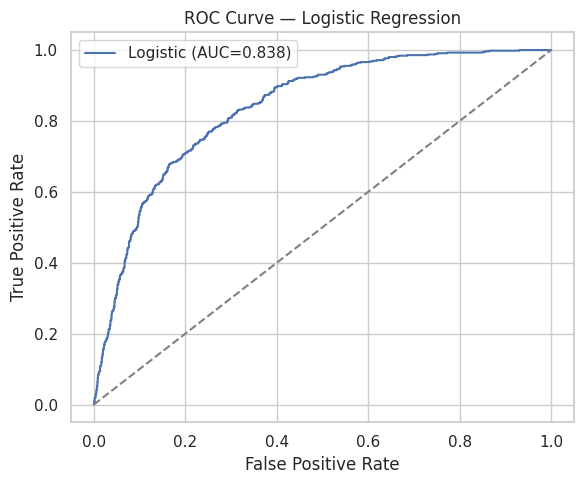

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, log_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic (AUC={log_auc:.3f})")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend(); plt.tight_layout(); plt.show()


The logistic regression model directly estimates the probability of churn and shows strong performance, with an AUC of 0.84 on the test set, an accuracy of 80.6%, precision of 65.6% and recall of 56.9% supported by a LogLoss of 0.426. Key predictors include contract type, tenure, internet service, online security, technical support, payment method, and paperless billing. Customers with longer tenure or multi year contracts are less likely to churn, while those with fiber optic internet, paying by electronic check, or enrolled in paperless billing are more likely. Having online security or technical support substantially reduces churn risk. Unlike linear regression, logistic regression avoids issues with residual normality and probability bounds, and its coefficients translate directly into odds ratios, making interpretation more meaningful. Overall, the model demonstrates good discriminatory ability and strong probabilities, providing both predictive power and actionable insights into customer churn.

Strengths: Easy to interpret, produces valid probability estimates within [0,1], effectively models linear relationships, and is fast to train and deploy.

Weaknesses: Assumes a linear relationship in the logit for continuous predictors and cannot capture non-linear effects without additional transformations or feature engineering.


#### GAM

In [ ]:

from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, GammaGAM, s

In [ ]:
vif_df = pd.DataFrame()
vif_df["feature"] = X_vars.columns
vif_df["VIF"] = [variance_inflation_factor(X_vars.values, i) for i in range(X_vars.shape[1])]

X_vars = X_vars.copy()
for feat, vif_val in zip(vif_df["feature"], vif_df["VIF"]):
    if vif_val == np.inf:
        X_vars.drop(columns=[feat], inplace=True)

In [ ]:
from pygam import LogisticGAM, s, l
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make sure X and y are numeric arrays
X = X_vars.astype(float).to_numpy()
y = y_var.astype(int).to_numpy()

# Identify continuous and dummy columns
continuous_features = ["tenure", "MonthlyCharges", "TotalCharges"]
cont_idx = [i for i, col in enumerate(X_vars.columns) if col in continuous_features]
lin_idx  = [i for i, col in enumerate(X_vars.columns) if col not in continuous_features]

terms = None
for i in cont_idx:
    terms = s(i) if terms is None else terms + s(i)
for i in lin_idx:
    terms = l(i) if terms is None else terms + l(i)

gam = LogisticGAM(terms=terms).gridsearch(X, y)



100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


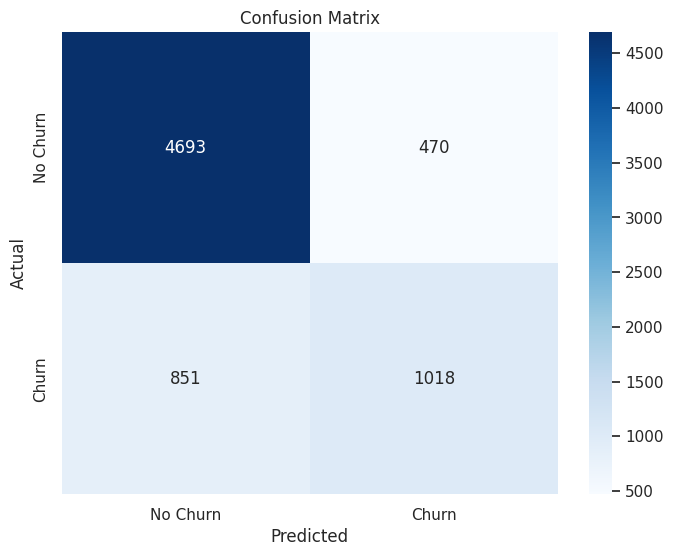

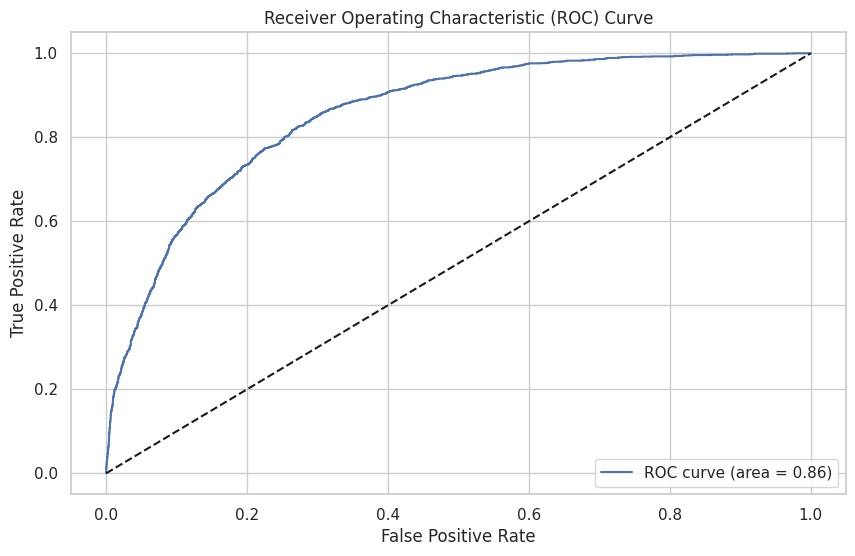

In [ ]:
gam.fit(X,y)
y_pred_prob = gam.predict_proba(X)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_var, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_var, y_pred_prob)
roc_auc = roc_auc_score(y_var, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("\n### GAM Model Performance ###")

# Calculate performance metrics
accuracy_gam = gam.accuracy(X, y)

print(f" Accuracy: {accuracy_gam:.4f}")
print(f" AUC: {roc_auc:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_var, y_pred_class))


### GAM Model Performance ###
 Accuracy: 0.8121
 AUC: 0.8558

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5163
           1       0.68      0.54      0.61      1869

    accuracy                           0.81      7032
   macro avg       0.77      0.73      0.74      7032
weighted avg       0.80      0.81      0.80      7032



In Generalized Additive Models (GAMs), the relationship between predictors and churn is modeled as a sum of smooth functions for continuous variables and linear contributions for categorical ones, unlike linear or logistic regression which rely only on linear combinations. This allows GAMs to capture nonlinear patterns, meaning coefficients are not interpreted as simple one unit changes but through the shape of smooth effect plots for predictors such as tenure, monthly charges, and total charges. Interpretation therefore focuses on these smooth curves to understand how churn risk varies across different ranges of continuous predictors, while dummy variables can still be interpreted in terms of their positive or negative influence on churn odds.

Regarding performance, the confusion matrix shows an overall accuracy of 81.2%, with 4693 true negatives, 1018 true positives, 470 false positives, and 851 false negatives. The model’s sensitivity (recall) is 54.5%, indicating moderate effectiveness in correctly identifying churners. The model achieves a precision of 68.4%, meaning that over two thirds of the predicted churn cases were actual churners. Finally, the AUC of 86% demonstrates strong discriminatory ability, confirming that the model reliably distinguishes between customers who churn and those who stay.

Strengths: Able to capture complex, non-linear patterns without requiring manual feature transformations. Provides interpretability through smooth plots for continuous variables and coefficient estimates for categorical variables.

Weaknesses: More complex to implement and communicate compared to simpler models. Smooth terms can be less intuitive, making it difficult to translate results into odds ratios or straightforward business insights.


## Model Comparison
Based on the evaluation metrics and visualizations, the Generalized Additive Model demonstrates superior performance to both Linear and Logistic Regression models in predicting customer churn. The GAM achieves the highest accuracy, AUC, specificity, and precision, indicating its strong discriminatory power. Although its sensitivity is marginally lower than Logistic Regression, the overall performance advantage of the GAM is substantial.

In terms of interpretability, Linear and Logistic Regression models provide straightforward insights into the relationship between predictors and the response variable through their coefficients. This makes them easier to understand and explain to stakeholders. However, the GAM's flexibility in capturing nonlinear relationships can lead to more complex interpretations. While the GAM's smooth functions can reveal patterns in the data that linear models might miss, interpreting these functions can be challenging. Therefore, the choice between the GAM and linear/logistic models depends on the balance between predictive performance and interpretability.

*For telecommunications companies that prioritize accurate predictions over detailed explanations, the GAM is the recommended choice.*
Also:

- Adopt GAM as the primary model for customer churn prediction, given its ability to capture complex non-linear patterns.
- Use Logistic Regression in parallel to provide simpler, easily interpretable explanations for business stakeholders.
- Implement a real-time risk scoring system that translates model predictions into actionable churn probabilities.
- Develop interactive dashboards to visualize non-linear effects and highlight key drivers of churn in a business-friendly format.